In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

In [9]:
df = pd.read_pickle('../bag_data/imu_bag_fixed.pickle')

In [10]:
df.shape

(288688, 71)

In [11]:
df.columns

Index(['cmd_vel__angular_x', 'cmd_vel__angular_y', 'cmd_vel__angular_z',
       'cmd_vel__linear_x', 'cmd_vel__linear_y', 'cmd_vel__linear_z',
       'imu__angular_velocity_covariance0',
       'imu__angular_velocity_covariance1',
       'imu__angular_velocity_covariance2',
       'imu__angular_velocity_covariance3',
       'imu__angular_velocity_covariance4',
       'imu__angular_velocity_covariance5',
       'imu__angular_velocity_covariance6',
       'imu__angular_velocity_covariance7',
       'imu__angular_velocity_covariance8', 'imu__angular_velocity_x',
       'imu__angular_velocity_y', 'imu__angular_velocity_z',
       'imu__linear_acceleration_covariance0',
       'imu__linear_acceleration_covariance1',
       'imu__linear_acceleration_covariance2',
       'imu__linear_acceleration_covariance3',
       'imu__linear_acceleration_covariance4',
       'imu__linear_acceleration_covariance5',
       'imu__linear_acceleration_covariance6',
       'imu__linear_acceleration_covariance7

In [12]:
df.describe()

,cmd_vel__angular_x,cmd_vel__angular_y,cmd_vel__angular_z,cmd_vel__linear_x,cmd_vel__linear_y,cmd_vel__linear_z,imu__angular_velocity_covariance0,imu__angular_velocity_covariance1,imu__angular_velocity_covariance2,imu__angular_velocity_covariance3,imu__angular_velocity_covariance4,imu__angular_velocity_covariance5,imu__angular_velocity_covariance6,imu__angular_velocity_covariance7,imu__angular_velocity_covariance8,imu__angular_velocity_x,imu__angular_velocity_y,imu__angular_velocity_z,imu__linear_acceleration_covariance0,imu__linear_acceleration_covariance1,imu__linear_acceleration_covariance2,imu__linear_acceleration_covariance3,imu__linear_acceleration_covariance4,imu__linear_acceleration_covariance5,imu__linear_acceleration_covariance6,imu__linear_acceleration_covariance7,imu__linear_acceleration_covariance8,imu__linear_acceleration_x,imu__linear_acceleration_y,imu__linear_acceleration_z,imu__orientation_covariance0,imu__orientation_covariance1,imu__orientation_covariance2,imu__orientation_covariance3,imu__orientation_covariance4,imu__orientation_covariance5,imu__orientation_covariance6,imu__orientation_covariance7,imu__orientation_covariance8,imu__orientation_w,imu__orientation_x,imu__orientation_y,imu__orientation_z,robot_markerset_ground_pose__theta,robot_markerset_ground_pose__x,robot_markerset_ground_pose__y,robot_markerset_pose__pose_orientation_w,robot_markerset_pose__pose_orientation_x,robot_markerset_pose__pose_orientation_y,robot_markerset_pose__pose_orientation_z,robot_markerset_pose__pose_position_x,robot_markerset_pose__pose_position_y,robot_markerset_pose__pose_position_z,rosout__level,rosout__line,rosout_agg__level,rosout_agg__line,vel__twist_angular_x,vel__twist_angular_y,vel__twist_angular_z,vel__twist_linear_x,vel__twist_linear_y,vel__twist_linear_z
count,8198.0,8198.0,8198.000000,8198.000000,8198.0,8198.0,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,30286.000000,30286.000000,30286.000000,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,30286.00000,30286.000000,30286.000000,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,3.028600e+04,56256.000000,56256.000000,56256.000000,56256.000000,56256.000000,56256.000000,56256.000000,56256.000000,56256.000000,56256.000000,12.0,12.000000,8.0,8.000000,60572.0,60572.0,60572.000000,60572.000000,60572.0,60572.0
mean,0.0,0.0,-0.016821,0.349689,0.0,0.0,1.623283e+199,-6.164841e-151,-2.254880e+212,6.986017e+146,-1.290642e-134,1.127736e-296,3.074673e+87,-5.911161e-66,-7.082012e+100,-0.332613,-0.024943,-0.000764,1.265747e+20,3.262745e-297,3.132549e+171,7.565483e-306,2.098416e+138,-3.167617e+10,1.541840e+94,-5.642333e+19,-4.635159e+24,-19.83098,-1.568076,-0.005081,7.659457e+251,-1.971343e-138,5.734721e-116,2.329727e+06,-9.506123e+04,1.768845e-86,-1.563870e+263,-2.718904e+244,-8.168105e-139,-6.471172e+26,1.631763e-34,5.109766e-311,9.512206e+123,0.392209,-1.030324,0.420186,0.683593,0.013262,-0.020334,0.147248,-1.030324,0.420186,0.731579,2.0,201.166667,2.0,195.750000,0.0,0.0,0.000068,0.153903,0.0,0.0
std,0.0,0.0,0.885469,0.587472,0.0,0.0,0.000000e+00,0.000000e+00,inf,8.872690e+130,2.443989e-150,0.000000e+00,0.000000e+00,2.108474e-81,1.554161e+85,0.209141,0.023024,0.011843,8.192135e+04,0.000000e+00,inf,0.000000e+00,9.916003e+122,3.814760e-06,1.852704e+78,1.638427e+04,0.000000e+00,0.00000,0.197804,0.275668,inf,2.983386e-154,0.000000e+00,0.000000e+00,2.910431e-11,0.000000e+00,0.000000e+00,inf,0.000000e+00,1.374412e+11,0.000000e+00,0.000000e+00,1.174291e+108,1.088331,0.867439,0.747273,0.563455,0.021093,0.024697,0.438067,0.867439,0.747273,0.369220,0.0,29.160476,0.0,35.151712,0.0,0.0,0.431917,0.329740,0.0,0.0
min,0.0,0.0,-2.413274,-1.364818,0.0,0.0,1.623283e+199,-6.164841e-151,-2.254880e+212,6.986017e+146,-1.290642e-134,1.127736e-296,3.074673e+

In [13]:
dffilt = df.copy()
dffilt = dffilt[dffilt.vel__twist_linear_x.notnull()]

In [14]:
dffilt.shape

(60572, 71)

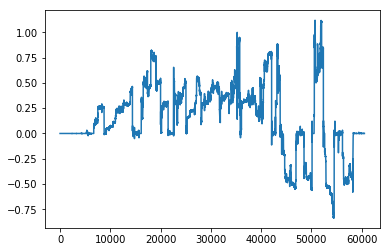

In [15]:
plt.plot(dffilt.vel__twist_linear_x.values)
plt.show()

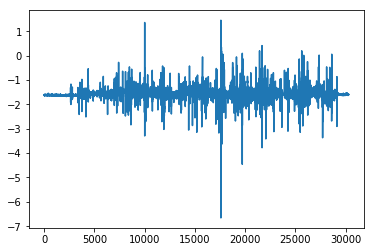

In [37]:
plt.plot(df[df.imu__linear_acceleration_y.notnull()].imu__linear_acceleration_y.values)
plt.show()

In [16]:
dffilt2 = df.copy()
dffilt2 = dffilt2[dffilt2.imu__angular_velocity_x.notnull()]
#dffilt2 = dffilt2.imu__angular_velocity_x

In [17]:
dffilt2.shape

(30286, 71)

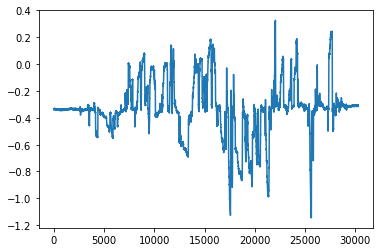

In [18]:
plt.plot(dffilt2.imu__angular_velocity_x.values)
plt.show()

(30286,)
[1. 1. 1. 1. 1.]
(30286,)


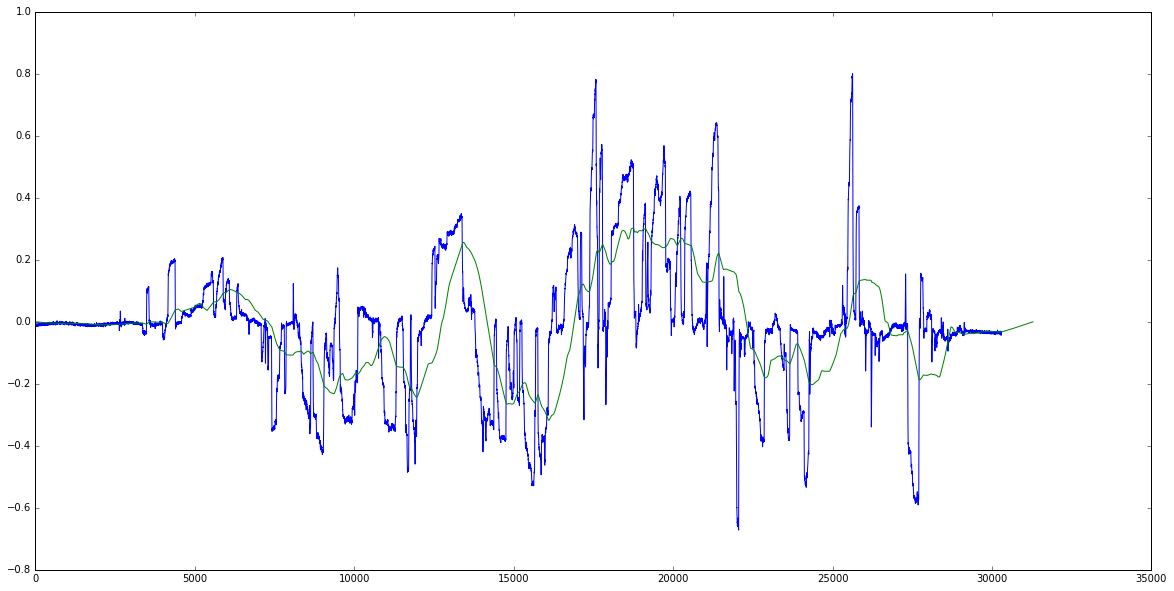

In [59]:
imu_x = -dffilt2.imu__angular_velocity_x.values.copy()
imu_x -= 0.345464
print(imu_x.shape)
print(np.ones((5)))
filtered_imu_x = np.convolve(imu_x,np.ones(1000)*(1.0/1000.0))
print(imu_x.shape)
plt.figure(figsize=(20,10))
plt.plot(imu_x)
plt.plot(filtered_imu_x)
plt.show()

In [82]:
print(df[df.robot_markerset_ground_pose__theta.notnull()].robot_markerset_ground_pose__theta[::2][1000:1100])

2018-04-12 12:54:34.947661568   -0.269054
2018-04-12 12:54:34.949180928   -0.269197
2018-04-12 12:54:34.950497280   -0.269214
2018-04-12 12:54:34.951580928   -0.269254
2018-04-12 12:54:34.952960256   -0.269300
2018-04-12 12:54:34.954105600   -0.269365
2018-04-12 12:54:34.955351808   -0.269403
2018-04-12 12:54:34.956551936   -0.269356
2018-04-12 12:54:34.957748480   -0.269364
2018-04-12 12:54:34.958894848   -0.269312
2018-04-12 12:54:34.960003840   -0.269323
2018-04-12 12:54:34.961357312   -0.269376
2018-04-12 12:54:34.962800896   -0.269311
2018-04-12 12:54:34.963771648   -0.269289
2018-04-12 12:54:34.965264128   -0.269262
2018-04-12 12:54:34.966354176   -0.269330
2018-04-12 12:54:34.967693312   -0.269360
2018-04-12 12:54:34.969018368   -0.269390
2018-04-12 12:54:34.970195968   -0.269447
2018-04-12 12:54:34.971491584   -0.269400
2018-04-12 12:54:35.245189632   -0.269337
2018-04-12 12:54:35.247616768   -0.269421
2018-04-12 12:54:35.248748800   -0.269385
2018-04-12 12:54:35.250138112   -0

In [61]:
imu_x[abs(imu_x) < 0.1] = 0

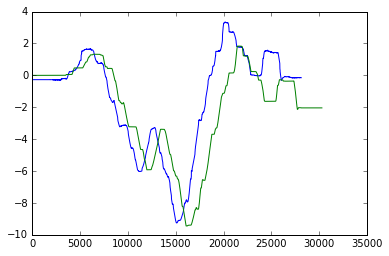

In [101]:
imu_cumsum_x = np.cumsum(imu_x * 0.01)
filtered_imu_cumsum_x = np.cumsum(filtered_imu_x * 0.01) 
#plt.plot(imu_cumsum_x)
plt.plot(np.unwrap(df[df.robot_markerset_ground_pose__theta.notnull()].robot_markerset_ground_pose__theta[::2].values))
plt.plot(imu_cumsum_x*1.0)
#plt.plot(filtered_imu_cumsum_x*1.0)
plt.show()